In [9]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.insert(1, '/viscam/projects/audio_nerf/transfer/devocalization/masonstuff')


import numpy as np
import matplotlib.pyplot as plt
import scipy
import glob
import viz
from IPython.display import Audio
ref_dir = "/viscam/projects/audio_nerf/transfer/devocalization/VocalImitationSet/original_recordings/reference"
im_dir = "/viscam/projects/audio_nerf/transfer/devocalization/VocalImitationSet/vocal_imitations/included"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
len(all_ref)


302

In [24]:
len(all_im)

5601

In [10]:
all_ref = sorted(glob.glob(os.path.join(ref_dir, "*")))
all_im = sorted(glob.glob(os.path.join(im_dir, "*")))

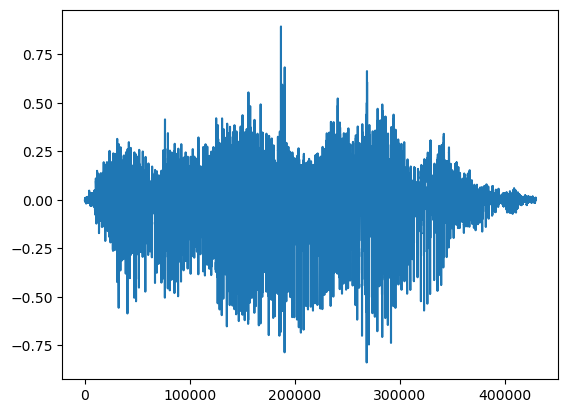

In [17]:
fs, ref = scipy.io.wavfile.read(all_ref[0])
ref = ref/32768
plt.plot(ref)

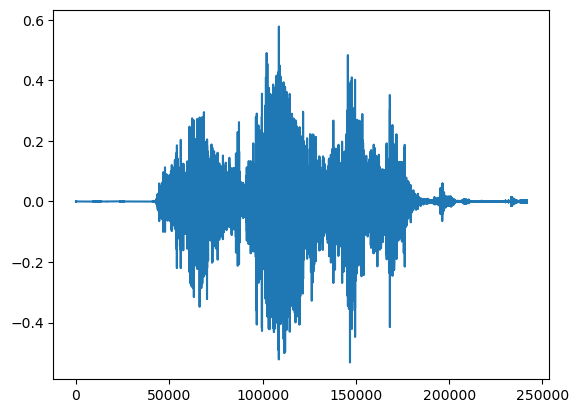

In [22]:
fs, im = scipy.io.wavfile.read(all_im[2])
im = im/32768
plt.plot(im)
Audio(im, rate=fs)

# Filtering

In [26]:
def filter_files_by_rating(threshold):
    
    filename = "/viscam/projects/audio_nerf/transfer/devocalization/VocalImitationSet/vocal_imitations_assessment.txt"
    results = []
    with open(filename, 'r') as file:
        next(file) # Skip first line
        
        for line in file:
            parts = line.strip().split('\t')
            try:
                rating = float(parts[-1])
                print("rating of " + parts[-1])
            except:
                print("blank ranking")  

In [57]:
filename = "/viscam/projects/audio_nerf/transfer/devocalization/VocalImitationSet/vocal_imitations_assessment.txt"
results = []
with open(filename, 'r') as file:
    next(file) # Skip first line

    for line in file:
        parts = line.strip().split('\t')
        try:
            rating = float(parts[-1])
        except:
            pass
        
        if rating < 40 and rating > 30:
            
            print("Rating of " + parts[-1])
            print("Imitation File " + parts[2])
            print("ref filename " + parts[3])
            print()
            print()
            im_path = os.path.join("/viscam/projects/audio_nerf/transfer/devocalization/VocalImitationSet/vocal_imitations/included/", parts[2])
            ref_path = os.path.join("/viscam/projects/audio_nerf/transfer/devocalization/VocalImitationSet/original_recordings/reference", parts[3])
            
            fs_1, im = scipy.io.wavfile.read(im_path)
            print(fs)
            fs_2, ref = scipy.io.wavfile.read(ref_path)
            print(fs)
            ref = ref/32768
            im = im/32768
            print(np.max(ref))
            print(ref.ndim)
            print(ref.shape)
            
            if ref.ndim > 1:
                ref = np.mean(ref, axis=1)
    
            display(Audio(im, rate=fs_1))
            print(ref.dtype)
            display(Audio(ref, rate=fs_2))
            break

blank ranking
blank ranking
blank ranking
blank ranking
blank ranking
blank ranking
blank ranking
blank ranking
blank ranking
blank ranking
blank ranking
blank ranking
rating of 36.0
imitation filename 004Animal_Domestic animals_ pets_Dog_Bark-6404297138896896.wav
ref filename 004Animal_Domestic animals_ pets_Dog_Bark_reference.wav


96000
96000
0.999969482421875
2
(687813, 2)


float64
